<a href="https://colab.research.google.com/github/emitejadaa/pythonNotebooks/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# !pip install keras

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

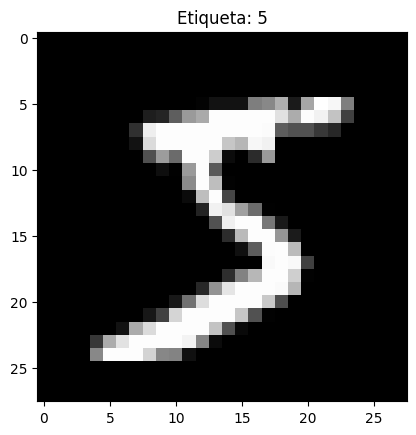

In [ ]:
import matplotlib.pyplot as plt

# Mostrar la primera imagen antes de normalizar
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.show()


In [ ]:
print(x_train[0])
print(y_train)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
x_train=x_train.reshape((-1,28*28))
x_test=x_test.reshape((-1,28*28))

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8103 - loss: 7.9301
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9087 - loss: 0.3784
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9287 - loss: 0.2683
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9386 - loss: 0.2384
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9465 - loss: 0.2113


In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9359 - loss: 0.2597


In [ ]:
print(f"acuracy= {test_acc}")
print(f"lost= {test_loss}")

acuracy= 0.9420999884605408
lost= 0.24321787059307098


In [ ]:
class DibujoApp:
    def __init__(self, root):
        self.canvas = tk.Canvas(root, width=280, height=280, bg="white")
        self.canvas.pack()
        self.image = Image.new("L", (280, 280), color=255)
        self.draw = ImageDraw.Draw(self.image)

        self.canvas.bind("<B1-Motion>", self.dibujar)
        self.boton = tk.Button(root, text="Predecir", command=self.predecir)
        self.boton.pack()
        self.resultado = tk.Label(root, text="")
        self.resultado.pack()

    def dibujar(self, event):
        x, y = event.x, event.y
        r = 8
        self.canvas.create_oval(x-r, y-r, x+r, y+r, fill='black')
        self.draw.ellipse([x-r, y-r, x+r, y+r], fill=0)

    def predecir(self):
        # Reducir a 28x28
        img = self.image.resize((28, 28))
        img = ImageOps.invert(img)
        img = np.array(img).astype("float32") / 255.0
        img = img.reshape(1, 784)
        pred = model.predict(img)
        self.resultado.config(text=f"Predicción: {np.argmax(pred)}")

In [ ]:
ventana = tk.Tk()
ventana.title("Reconocimiento de dígitos (MNIST)")
app = DibujoApp(ventana)
ventana.mainloop()